# Otto product class prediction

# Description of our problem 

For this [competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/overview/description), we have provided a dataset with 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories. The winning models will be open sourced.

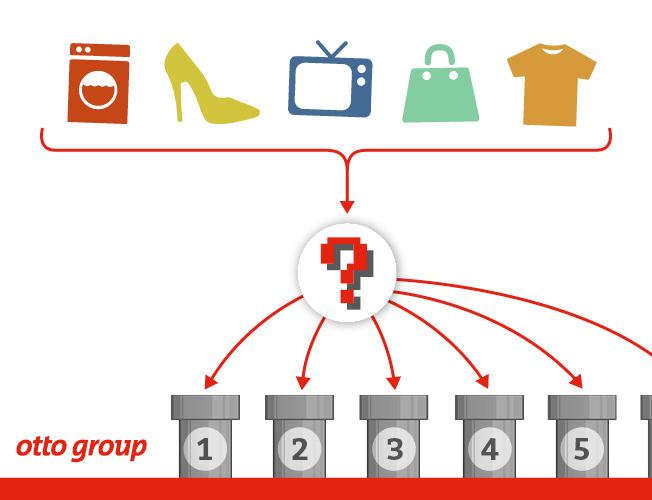

## Evaluation: logloss

Submissions are evaluated using the multi-class logarithmic loss. Each product has been labeled with one true category. For each product, you must submit a set of predicted probabilities (one for every category). The formula is then, 
$$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij}),$$

where N is the number of products in the test set, M is the number of class labels, log is the natural logarithm, yij is 1 if observation i is in class j and 0 otherwise, and pij is the predicted probability that observation i belongs to class j

.

The submitted probabilities for a given product are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with max(min(p,1−10−15),10−15)
.

## Data 
Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

There are nine categories for all products. Each target category represents one of our most important product categories (like fashion, electronics, etc.). The products for the training and testing sets are selected randomly.## Data 

# Imports 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Helper Functions


In [15]:
def load_data(data): 
    df = pd.read_csv(data)
    return df

# EDA

In [16]:
PATH = 'data/'

In [17]:
# load data in
df_raw_train = load_data(f'{PATH}train.csv')
df_raw_test = load_data(f'{PATH}test.csv')


In [19]:
df_train = df_raw_train.copy()
df_test = df_raw_test.copy()

## Take a brief survey of the data

In [ ]:
### Look at the head of the train and test to get a 

In [20]:
df_train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [21]:
df_test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0
